# Análisis de Secuencias Proteicas en Python

Este notebook contiene una variedad de funciones en Python para obtener información detallada sobre una secuencia proteica. Utilizamos las bibliotecas **Biopython** y **ProDy** para realizar análisis complejos como la polaridad, hidrofobicidad, tamaño, masa, dominios, punto isoeléctrico (pI), y más.

## Instalación de Bibliotecas Necesarias

Para ejecutar este notebook, necesitamos instalar las bibliotecas Biopython, ProDy y matplotlib. Puedes instalarlas utilizando pip:

```sh
!pip install biopython prody matplotlib


In [ ]:
#Si no tienes las librerias instaladas, corre este código
!pip install biopython prody matplotlib bio2bel_pfam py3Dmol pandas

## Importamos las bibliotecas necesarias

In [82]:
import numpy as np
from Bio import SeqIO
from Bio.SeqUtils import ProtParam
from Bio.SeqUtils.ProtParam import ProteinAnalysis
from Bio.SeqUtils import IsoelectricPoint
import matplotlib.pyplot as plt
from prody import *
import py3Dmol
import os
import pandas as pd
from Bio.SeqUtils import seq3

### Definimos la secuencia diana
Para este proyecto vamos a seleccionar una proteína aleatoria y vamos a intentar obtener la mayor cantidad de datos a partir de esta secuencia, este tipo de proyectos son de mucho interés cuando queremos realizar análisis comparativos, modelos de **inteligencia artificial** o cualquier aproximación de **data science** centrada en la secuencia proteica

In [3]:
secuencia_proteica = "MVHLTPEEKSAVTALWGKVNVDEVGGEALGRLLVVYPWTQRFFESFGDLSTPDAVMGNPKVKAHGKKVLGAFSDGLAHLDNLKGTFATLSELHCDKLHVDPENFRLLGNVCVLAHHFGKEFTPPVQAAYQKVVAGVANALAHKYH"

Ahora con la función *ProteinAnalysis* vamos obtener información relevante de nuestra proteína como el peso molecular, el punto Isoeléctrico o el porcentaje de cada aminoácido.

Peso molecular: 15785.92 Da
Punto isoeléctrico (pI): 6.74
Composición de Aminoácidos:
        A: 10.34%         M: 1.38%
        C: 1.38%         N: 4.14%
        D: 4.83%         P: 4.83%
        E: 5.52%         Q: 2.07%
        F: 5.52%         R: 2.07%
        G: 8.97%         S: 3.45%
        H: 6.21%         T: 4.83%
        I: 0.00%         V: 11.72%
        K: 7.59%         W: 1.38%
        L: 11.72%         Y: 2.07%
Masa promedio por residuo: 108.87 Da


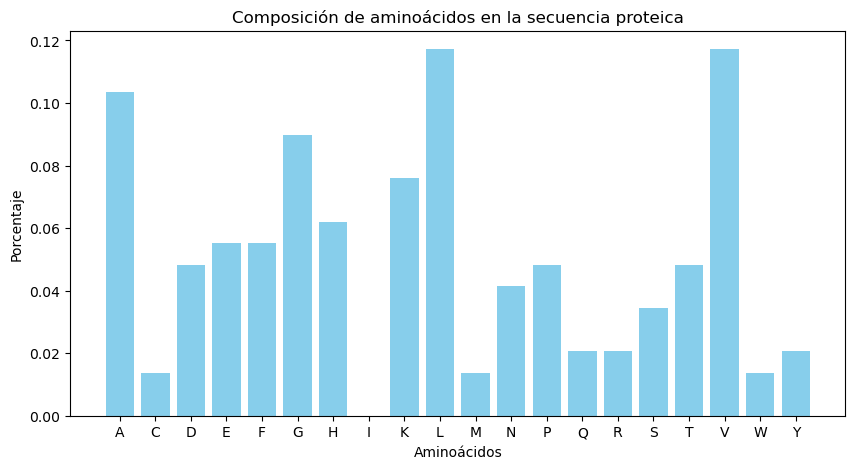

In [27]:
# Análisis de la secuencia proteica
analisis = ProteinAnalysis(secuencia_proteica)

# Peso molecular
peso_molecular = analisis.molecular_weight()
print(f"Peso molecular: {peso_molecular:.2f} Da")

# Punto isoeléctrico (pI)
pI = analisis.isoelectric_point()
print(f"Punto isoeléctrico (pI): {pI:.2f}")

# Composición de aminoácidos
composicion_aa = analisis.get_amino_acids_percent()

# Obtener la lista de aminoácidos y sus porcentajes
aminoacidos = list(composicion_aa.keys())
porcentajes = list(composicion_aa.values())

# Imprimir en dos columnas
print("Composición de Aminoácidos:")
columna1 = len(aminoacidos) // 2
for i in range(columna1):
    aa1, porcentaje1 = aminoacidos[i], porcentajes[i]
    aa2, porcentaje2 = aminoacidos[i + columna1], porcentajes[i + columna1]
    print(f"        {aa1}: {porcentaje1:.2%}         {aa2}: {porcentaje2:.2%}")

# Si el número de aminoácidos es impar, imprime el último elemento
if len(aminoacidos) % 2 != 0:
    aa, porcentaje = aminoacidos[-1], porcentajes[-1]
    print(f"        {aa}: {porcentaje:.2%}")

# Masa
# La masa total ya se ha calculado con el peso molecular. Podemos también calcular la masa promedio por residuo.
masa_promedio_residuo = peso_molecular / len(secuencia_proteica)
print(f"Masa promedio por residuo: {masa_promedio_residuo:.2f} Da")

# Visualización de la composición de aminoácidos
aminoacidos = list(composicion_aa.keys())
porcentajes = list(composicion_aa.values())

plt.figure(figsize=(10, 5))
plt.bar(aminoacidos, porcentajes, color='skyblue')
plt.xlabel('Aminoácidos')
plt.ylabel('Porcentaje')
plt.title('Composición de aminoácidos en la secuencia proteica')
plt.show()


Ya hemos obtenido una información muy relevante de nuestra proteína, ahora sabemos que su masa molecular es de 15.8kDa, que su punto isoeléctrico es 6.74 y conocemos también su proporción de aminoácidos. Vamos a continuar ahora un poco más allá explorando las características de estos aminoácidos.

    -Hidrofobicidad
    
    -Polaridad
    
    -Flexibilidad
    
    -Aromaticidad
    
    -Proporción de estructura secundaria

In [6]:
# Hidrofobicidad (Gravy)
hidrofobicidad = analisis.gravy()
print(f"Hidrofobicidad (GRAVY): {hidrofobicidad:.2f}")

# Polaridad
# Calculamos la polaridad usando una aproximación basada en el porcentaje de aminoácidos polares
aminoacidos_polares = "STYCNQ"
porcentaje_polares = sum([composicion_aa[aa] for aa in aminoacidos_polares])
print(f"Polaridad: {porcentaje_polares:.2%}")

# Flexibilidad
flexibility = analisis.flexibility()
print("Flexibilidad (primeros 10 residuos):")
print(flexibility[:10])

# Aromaticidad
aromaticity = analisis.aromaticity()
print(f"Aromaticidad: {aromaticity:.2%}")

# Contenido de secuencias secundarias
helix_content = analisis.secondary_structure_fraction()[0]
turn_content = analisis.secondary_structure_fraction()[1]
sheet_content = analisis.secondary_structure_fraction()[2]
print(f"Contenido de hélice: {helix_content:.2%}")
print(f"Contenido de giro: {turn_content:.2%}")
print(f"Contenido de hoja-beta: {sheet_content:.2%}")

Hidrofobicidad (GRAVY): -0.04
Polaridad: 17.93%
Flexibilidad (primeros 10 residuos):
[1.01675, 1.0386785714285716, 1.047095238095238, 1.0531071428571428, 1.0377619047619049, 1.022392857142857, 1.0029642857142858, 1.003047619047619, 0.9763214285714286, 0.9657499999999999]
Aromaticidad: 8.97%
Contenido de hélice: 32.41%
Contenido de giro: 21.38%
Contenido de hoja-beta: 28.97%


## Dominios funcionales
Ahora vamos a utilizar la Api de Pfam para buscar dominios funcionales en nuestra proteína

In [16]:
# Dominio funcional
# Usamos ProDy para buscar posibles dominios funcionales (necesita conexión a Internet)
try:
    alignments = searchPfam(secuencia_proteica)
    print("Posibles dominios funcionales encontrados:")
    for alignment in alignments:
        print(alignment)
except Exception as e:
    print(f"No se pudo obtener información de dominios funcionales: {e}")


@> Submitted Pfam search for sequence "MVHLTPEEKSAVTALW...".


Posibles dominios funcionales encontrados:
PF00042


Haciendo una simple búsqueda en Pfam podemos obtener mucha información del dominio: https://www.ebi.ac.uk/interpro/entry/pfam/PF00042/

Esta entrada cubre la mayoría de la familia de proteínas de globina, pero omite algunas globinas bacterianas y las protoglobinas. Las globinas son proteínas que contienen hemo y están involucradas en la unión y/o transporte de oxígeno. Pertenecen a una familia muy grande y bien estudiada que está ampliamente distribuida en muchos organismos. Las globinas han evolucionado a partir de un ancestro común y pueden dividirse en tres grupos: globinas de un solo dominio y dos tipos de globinas quiméricas, flavohemoglobinas y sensores acoplados a la globina. Las bacterias tienen los tres tipos de globinas, mientras que las arqueas carecen de flavohemoglobinas y los eucariotas carecen de sensores acoplados a la globina. Varios tipos de hemoglobinas funcionalmente diferentes pueden coexistir en la misma especie. Los principales tipos de globinas incluyen:

- Hemoglobina (Hb): tetrámero de dos cadenas alfa y dos cadenas beta, aunque las formas embrionarias y fetales pueden sustituir la cadena alfa o beta por otras con mayor afinidad por el oxígeno, como las cadenas gamma, delta, épsilon o zeta. La Hb transporta oxígeno desde los pulmones a otros tejidos en vertebrados. Las proteínas Hb también están presentes en organismos unicelulares donde actúan como enzimas o sensores.

- Mioglobina (Mb): proteína monomérica responsable del almacenamiento de oxígeno en el músculo de vertebrados.

- Neuroglobina: una proteína de hemo similar a la mioglobina expresada en el cerebro y la retina de vertebrados, donde está involucrada en la neuroprotección contra el daño debido a la hipoxia o la isquemia. La neuroglobina pertenece a una rama de la familia de globinas que divergió tempranamente en la evolución.

- Citoglobina: un sensor de oxígeno expresado en múltiples tejidos. Relacionado con la neuroglobina.

...

![Globina](Globin.gif)

# Un pequeño paso por la biología estructural
    Aprovechando el detalle de que Pfam nos permite ver estructuras tridimensionales de ejemplos de proteínas que tienen el dominio de interés, vamos a apreciar cómo podemos visualizar estas estructuras en python. En futuros trabajos, si os interesa mucho, podemos intentar obtener información tabulada a partir de las estructuras tridimensionales para realizar modelos, comparativas... 

In [51]:
def buscar_proteina_pdb(codigo_pdb):
    try:
        # Descargar y parsear la estructura PDB
        pdb_file = fetchPDB(codigo_pdb)
        protein = parsePDB(pdb_file)
        
        # Descomprimir el archivo .pdb.gz si existe
        if os.path.exists(f"{codigo_pdb}.pdb.gz"):
            os.system(f"gunzip {codigo_pdb}.pdb.gz")
        else:
            print(f"El archivo {codigo_pdb}.pdb.gz no existe.")
        
        # Cargar el archivo .pdb descomprimido y mostrarlo con Py3Dmol
        str_file = f"{codigo_pdb}.pdb"
        with open(str_file, 'r') as f:
            pdb_data = f.read()

        # Crear la vista Py3Dmol
        view = py3Dmol.view(width=800, height=600)
        view.addModel(pdb_data, 'pdb')
        view.setBackgroundColor('white')
        view.setStyle({'chain': 'A'}, {'cartoon': {'color': 'purple'}})
        view.zoomTo()
        view.show()

    except Exception as e:
        print(f"No se pudo obtener la estructura de la proteína con el código PDB {codigo_pdb}: {e}")

# Ejemplo: buscar y mostrar una proteína usando su código PDB
# Aquí se usa un código PDB de ejemplo, cambia '1A8M' por el código de la proteína que desees buscar
estructura_proteina = buscar_proteina_pdb('2xkg')


@> PDB file is found in working directory (2xkg.pdb).
@> 1016 atoms and 1 coordinate set(s) were parsed in 0.01s.


El archivo 2xkg.pdb.gz no existe.


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

### También podemos obtener información sobre este dominio de nuestra proteína, calculando peso molecular, PI, GRAVY ...

In [26]:
# Dominio funcional detallado
# Aquí detallamos los dominios encontrados en la secuencia
try:
    for alignment in alignments:
        start=int(alignments[alignment]["locations"]['ali_start'])
        end=int(alignments[alignment]["locations"]['ali_end'])
        domain_seq = secuencia_proteica[start:end]
        domain_analysis = ProteinAnalysis(domain_seq)
        domain_weight = domain_analysis.molecular_weight()
        domain_pI = domain_analysis.isoelectric_point()
        domain_gravy = domain_analysis.gravy()

        print(f"\nDominio: {alignment}")
        print(f"Secuencia: {domain_seq}")
        print(f"Peso molecular: {domain_weight:.2f} Da")
        print(f"Punto isoeléctrico (pI): {domain_pI:.2f}")
        print(f"Hidrofobicidad (GRAVY): {domain_gravy:.2f}")
except Exception as e:
    print(f"No se pudo obtener información detallada de los dominios: {e}")


Dominio: PF00042
Secuencia: ALGRLLVVYPWTQRFFESFGDLSTPDAVMGNPKVKAHGKKVLGAFSDGLAHLDNLKGTFATLSELHCDKLHVDPENFRLLGNVCVLAHHFGKEFTPPVQAAYQKVVAGVANAL
Peso molecular: 12271.00 Da
Punto isoeléctrico (pI): 8.05
Hidrofobicidad (GRAVY): 0.07


# Otras funciones de interés, inestabilidad proteica y conservación

In [53]:
# Más funciones útiles de Biopython
# Índice de inestabilidad
instability_index = analisis.instability_index()
print(f"Índice de inestabilidad: {instability_index:.2f}")
#Entropía
def calcular_entropia(secuencia):
    from collections import Counter
    import math
    contador = Counter(secuencia)
    frecuencia = [contador[aa] / len(secuencia) for aa in contador]
    entropia = -sum([f * math.log2(f) for f in frecuencia])
    return entropia

entropia = calcular_entropia(secuencia_proteica)
print(f"Entropía de Shannon: {entropia:.2f}")

# Función para calcular la proporción de residuos cargados (positivos y negativos)
def calcular_residuos_cargados(secuencia):
    cargados_positivos = "KRH"
    cargados_negativos = "DE"
    positivos = sum([secuencia.count(aa) for aa in cargados_positivos])
    negativos = sum([secuencia.count(aa) for aa in cargados_negativos])
    return positivos / len(secuencia), negativos / len(secuencia)

cargados_positivos, cargados_negativos = calcular_residuos_cargados(secuencia_proteica)
print(f"Proporción de residuos cargados positivos: {cargados_positivos:.2%}")
print(f"Proporción de residuos cargados negativos: {cargados_negativos:.2%}")

Índice de inestabilidad: 6.10
Entropía de Shannon: 3.96
Proporción de residuos cargados positivos: 15.86%
Proporción de residuos cargados negativos: 10.34%


In [71]:
# Análisis de la flexibilidad por región
def analizar_flexibilidad_regiones(secuencia, window_size=5):
    flexibilidad = analisis.flexibility()
    regiones = [flexibilidad[i:i+window_size] for i in range(0, len(flexibilidad), window_size)]
    regiones_flexibilidad = [np.mean(region) for region in regiones]
    return regiones_flexibilidad

regiones_flexibilidad = analizar_flexibilidad_regiones(secuencia_proteica)
print(f"Flexibilidad por regiones (ventana de 5 residuos): {regiones_flexibilidad}")

Flexibilidad por regiones (ventana de 5 residuos): [1.0386785714285716, 0.994095238095238, 0.9934785714285714, 1.0161833333333332, 1.0127619047619048, 0.9619928571428572, 0.9691380952380954, 0.9890714285714285, 1.0066404761904764, 1.0069785714285715, 1.0193952380952382, 1.022947619047619, 1.0127333333333333, 0.9967476190476191, 0.9914452380952381, 1.006816666666667, 0.9916571428571428, 0.9934952380952382, 0.997547619047619, 1.0103666666666666, 0.975097619047619, 0.9527190476190475, 0.9929595238095239, 1.0081119047619045, 0.9991190476190475, 0.989204761904762, 0.9808357142857143, 0.9922619047619049]


In [73]:
# Identificación de secuencias repetidas
def secuencias_repetidas(secuencia, min_length=3):
    repeticiones = []
    for i in range(len(secuencia)):
        for j in range(i + min_length, len(secuencia) + 1):
            sub = secuencia[i:j]
            if secuencia.count(sub) > 1 and sub not in repeticiones:
                repeticiones.append(sub)
    return repeticiones

repeticiones = secuencias_repetidas(secuencia_proteica)
print("Secuencias repetidas:")
print(repeticiones)

Secuencias repetidas:
['RLL', 'LAH']


In [81]:
# Función para buscar patrones específicos en la secuencia
def buscar_patron(secuencia, patron):
    import re
    return [m.start() for m in re.finditer(patron, secuencia)]
patron_busqueda = "KK"
posiciones_patron = buscar_patron(secuencia_proteica, patron_busqueda)
print(f"Posición/es del patrón '{patron_busqueda}': {posiciones_patron}")

Posición/es del patrón 'KK': [65]


# Importancia de los K-mers en Machine Learning aplicado a Proteínas

Los K-mers son secuencias cortas de aminoácidos en proteínas, fundamentales en el aprendizaje automático aplicado a proteínas por varias razones:

    -Captura de información local: Permiten capturar patrones locales importantes para la función de la proteína.

    -Reducción de la dimensionalidad: Facilitan el análisis al representar la secuencia de aminoácidos de manera más manejable.

    -Flexibilidad en la representación: Se adaptan a diferentes tipos de datos y problemas.

    -Integración de la información de la secuencia: Al considerar múltiples K-mers de diferentes longitudes, se captura información a múltiples escalas.

    -Aplicaciones diversas: Se utilizan en la predicción de la estructura y función de las proteínas, clasificación de familias y predicción de interacciones.

Los K-mers son una herramienta poderosa y versátil que mejora la comprensión de las proteínas y permite abordar una amplia gama de problemas biológicos mediante aprendizaje automático.

In [79]:
# Función para calcular la frecuencia de k-mers, si cambias el valor de la variable "k" cambiarás la longitud de los k-mers, siendo más informativos pero más variables y costosos computacionalmente
def calcular_frecuencia_kmers(secuencia, k=3):
    from collections import Counter
    kmers = [secuencia[i:i+k] for i in range(len(secuencia)-k+1)]
    frecuencia_kmers = Counter(kmers)
    return frecuencia_kmers
frecuencia_kmers = calcular_frecuencia_kmers(secuencia_proteica, k=2)
print("Frecuencia de k-mers (k=2):")
display(pd.DataFrame.from_dict(dict(frecuencia_kmers), orient='index').reset_index().T)
frecuencia_kmers = calcular_frecuencia_kmers(secuencia_proteica, k=3)
print("Frecuencia de k-mers (k=3):")
display(pd.DataFrame.from_dict(dict(frecuencia_kmers), orient='index').reset_index().T.head())
frecuencia_kmers = calcular_frecuencia_kmers(secuencia_proteica, k=4)
print("Frecuencia de k-mers (k=4):")
display(pd.DataFrame.from_dict(dict(frecuencia_kmers), orient='index').reset_index().T.head())

Frecuencia de k-mers (k=2):


,0,1,2,3,4,5,6,7,8,9,...,104,105,106,107,108,109,110,111,112,113
index,MV,VH,HL,LT,TP,PE,EE,EK,KS,SA,...,YQ,QK,VA,AG,GV,AN,NA,HK,KY,YH
0,1,1,2,1,3,2,1,1,1,1,...,1,1,2,1,1,1,1,1,1,1


Frecuencia de k-mers (k=3):


,0,1,2,3,4,5,6,7,8,9,...,130,131,132,133,134,135,136,137,138,139
index,MVH,VHL,HLT,LTP,TPE,PEE,EEK,EKS,KSA,SAV,...,VAG,AGV,GVA,VAN,ANA,NAL,ALA,AHK,HKY,KYH
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


Frecuencia de k-mers (k=4):


,0,1,2,3,4,5,6,7,8,9,...,132,133,134,135,136,137,138,139,140,141
index,MVHL,VHLT,HLTP,LTPE,TPEE,PEEK,EEKS,EKSA,KSAV,SAVT,...,VAGV,AGVA,GVAN,VANA,ANAL,NALA,ALAH,LAHK,AHKY,HKYH
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


### Con todo esto posees todas las herramientas necesarias para comenzar a extraer datos a partir de tus secuencias proteicas, usandolos como *inputs* para los modelos de IA o para proyectos basados en el estudio detallado de las proteínas.

#### Si te ha gustado, no olvides compartir el post de Linkedin, compartir el repositorio o dejar un comentario en mi cuenta personal de Linkedin.
#### Si quieres estar al tanto de futuros talleres cómo este, sígueme en https://www.linkedin.com/in/alonsofeliperuiz/